In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import numpy as np
import scipy.optimize 
import pandas as pd
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    """
    Calculate the Action of an object of of mass 'm' throw vertically upward from 
       'xini', such that 'tend' seconds later the object return to a height 'xend'.
       Delta t must be constant.
       
    The defaults units for S are J.s   
    """
    g=9.8
    t=float(tend)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

### Solution
\begin{align}
 x=&-\frac{1}{2} g t^2+v_0 t \,, & v=&-g t +v_0
\end{align}
At maximum height $t=t_{\text{end}}/2$ and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+v_0 \frac{t_{\text{end}}}{2} \,, & 0=&-g \frac{t_{\text{end}}}{2} +v_0
\end{align}
From the second equation $v_0=g t_{\text{end}}/2=14.7$ m/s, and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+ g \frac{t_{\text{end}}}{2} \frac{t_{\text{end}}}{2} \nonumber\\
 =&g\frac{ t_{\text{end}}^2  }{8}=11.025\ \text{m}\,.
\end{align}

In [4]:
df=pd.DataFrame({'t':[0.,1.5,3.],'x':[0.,11.025,0.]})

coeffs=np.polyfit(df.t,df.x,2)
P=np.poly1d(coeffs,variable='t')
print("- g t²/2 + v0 t=")
print(P)

- g t²/2 + v0 t=
      2
-4.9 t + 14.7 t + 8.205e-15


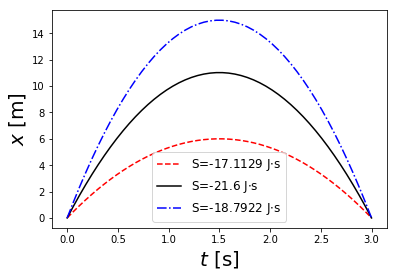

In [7]:
t=linspace(0,3,50)
xmax=[6,11.025,15]
ls=['r--','k-','b-.']
for i in  range(3):
    df=pd.DataFrame({'t':[0.,1.5,3.],'x':[0.,xmax[i],0.]})
    coeffs=np.polyfit(df.t,df.x,2)
    P=np.poly1d(coeffs)
    plt.plot(t,P(t),ls[i],label='S=%g J$\cdot$s' %S(P(t)))
    
plt.legend(loc='best',fontsize=12)    
plt.xlabel('$t$ [s]',size=20)
plt.ylabel('$x$ [m]',size=20)